# Actividad 1


## Eliminación de Duplicados y Tratamiento de Datos Faltantes
Contamos con un conjunto de datos ficticio de una tienda en línea que contiene información sobre clientes, incluyendo nombre, edad y correo electrónico. Realizar las siguientes tareas:
* Cargar el conjunto de datos.
* Identificar y eliminar las filas duplicadas.
* Manejar los datos faltantes en la columna de edad, evaluando cuál es la mejor decisión, considerando que vamos a realizar un análisis enfocado en grupos etarios de los clientes. Evaluar el impacto sobre el análisis si:
  * Se eliminan las filas que no contienen la edad.
  * Se completa el dato con la media de la columna.

In [1]:
# Importamos librerias
import pandas as pd

In [3]:
# Importamos datos de Google Sheets
ID_planilla = '13ufG0CQqpozGhJfh8t3T-01p4lcPPZa26TrrWhQux3c'
URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='
df = pd.read_csv(URL)
df.head()

,Nombre,Edad,Email
0,Elonore Over,40.0,eoverh6@ocn.ne.jp
1,Jacquette Gillbe,49.0,jgillbeb8@diigo.com
2,Sheelah Olechnowicz,61.0,solechnowiczch@mlb.com
3,Morris Bilovus,32.0,mbilovus3q@artisteer.com
4,Erda Geipel,60.0,egeipelj5@jalbum.net


In [4]:
# Veamos la estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  1032 non-null   object 
 1   Edad    973 non-null    float64
 2   Email   1032 non-null   object 
dtypes: float64(1), object(2)
memory usage: 24.3+ KB


### Eploracion y tratamiento de duplicados

In [5]:
# Cuantificamos los registros duplicados
df.duplicated().sum()

np.int64(32)

In [6]:
# Visualizar los registros duplicados
df[df.duplicated(keep=False)].sort_values(by="Nombre")

,Nombre,Edad,Email
577,Arnoldo Britney,52.0,abritney8f@arstechnica.com
838,Arnoldo Britney,52.0,abritney8f@arstechnica.com
535,Berny Rawlin,49.0,brawlin94@time.com
402,Berny Rawlin,49.0,brawlin94@time.com
907,Candace Ruperti,NaN,cruperti8t@furl.net
...,...,...,...
828,Veda Sherman,33.0,vsherman8y@mac.com
839,Vina Mein,64.0,vmein8o@sina.com.cn
1022,Vina Mein,64.0,vmein8o@sina.com.cn
607,Welch Addionizio,57.0,waddionizio91@unc.edu


In [7]:
# Usamos drop_duplicates() para eliminar los registros duplicados
df_pp1 = df.drop_duplicates()
df_pp1.duplicated().sum()

np.int64(0)

### Eploracion y tratamiento de nulos

In [8]:
# Ver si hay datos nulos y cuantos
df.isnull().sum()

,0
Nombre,0
Edad,59
Email,0


In [ ]:
# Mostrar hasta 10 filas en todas las salidas
pd.set_option('display.max_rows', 10)

In [9]:
# Visualizar los nulos
df[df.isnull().any(axis=1)][["Nombre", "Edad"]]

,Nombre,Edad
23,Timotheus Meggison,NaN
32,Dominga Dewdney,NaN
44,Peggy Songer,NaN
52,Dewey McCulley,NaN
53,Phil Triggol,NaN
74,Lilyan Dulton,NaN
78,Janina Florence,NaN
88,Del Lente,NaN
110,Wilone Sked,NaN
151,Ronnica Mabey,NaN


In [10]:
# Eliminar los nulos
df_pp2 = df.dropna(ignore_index=False)
df_pp2.isnull().sum()

,0
Nombre,0
Edad,0
Email,0


In [11]:
# Visualizamos despues de eliminar
df_pp2[df_pp2.isnull().any(axis=1)]

,Nombre,Edad,Email


In [ ]:
df_pp2

In [12]:
# Reemplazar nulos por un valor fijo
df_pp3 = df.fillna(0)
df_pp3.isnull().sum()

,0
Nombre,0
Edad,0
Email,0


In [20]:
# Reemplazar nulos por la media/mediana / moda
edad_media = df["Edad"].mean()
edad_mediana = df["Edad"].median()
edad_moda = df["Edad"].mode()
print(f"Edad - Media: {edad_media}")
print(f"Edad Mediana: {edad_mediana}")
print(f"\n Edad - Moda: {edad_moda} \n")

#df_pp3["Edad"] = df["Edad"].fillna(edad_mediana)
df_pp3.isnull().sum()

# algo interesante seria reemplazar los 59 valores nulos por
# 59 valores al azar entre Moda +- 10% por ejemplo

Edad - Media: 46.51284686536485
Edad Mediana: 47.0

 Edad - Moda: 0    58.0
Name: Edad, dtype: float64 



,0
Nombre,0
Edad,0
Email,0


In [14]:
df_pp3 = df.fillna(df.mean(numeric_only=True))
df_pp3.isnull().sum()

,0
Nombre,0
Edad,0
Email,0


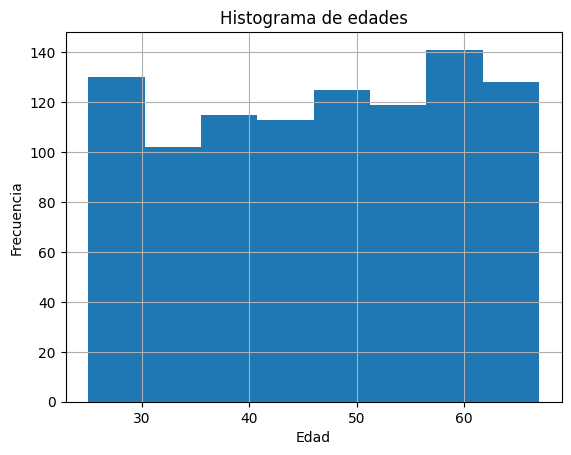

In [24]:
edades = df["Edad"]

import matplotlib.pyplot as plt
edades.hist(bins=8)
plt.title("Histograma de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

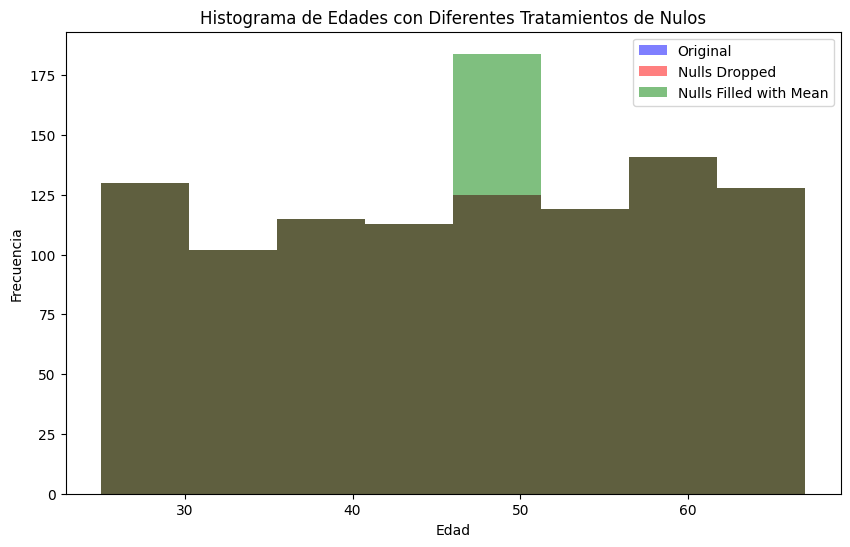

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(edades, bins=8, alpha=0.5, label='Original', color='blue')
plt.hist(df_pp2["Edad"], bins=8, alpha=0.5, label='Nulls Dropped', color='red')
plt.hist(df_pp3["Edad"], bins=8, alpha=0.5, label='Nulls Filled with Mean', color='green')
plt.title("Histograma de Edades con Diferentes Tratamientos de Nulos")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [15]:
df_pp3.sample(20)

,Nombre,Edad,Email
612,Con Dufer,64.000000,cduferfk@meetup.com
756,Grata Baldacchi,54.000000,gbaldacchine@nasa.gov
426,Dewain Kerfoot,40.000000,dkerfootb@shop-pro.jp
836,Maxy Voase,53.000000,mvoasee0@com.com
573,Lucilia Palke,56.000000,lpalke8a@prweb.com
421,Misha MacSkeaghan,47.000000,mmacskeaghanb9@discovery.com
243,Lorenza Moizer,31.000000,lmoizern0@vkontakte.ru
114,Ulrica Andor,50.000000,uandord6@bravesites.com
412,Salem Fley,39.000000,sfleyb4@jalbum.net
56,Glynda Wenderoth,59.000000,gwenderothm3@bbc.co.uk


In [16]:
df.describe()

,Edad
count,973.000000
mean,46.512847
std,12.307242
min,25.000000
25%,36.000000
50%,47.000000
75%,57.000000
max,67.000000


In [ ]:
import matplotlib.pyplot as plt
df_pp2["Edad"].hist(bins=8)
plt.title("Histograma de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
df.boxplot(column="Edad")

In [ ]:
import seaborn as sns
sns.boxplot(x=df["Edad"])
sns.pointplot(x=df["Edad"], color="red", join=False, estimator="mean")  # agrega la media
plt.title("Boxplot con media (rojo)")
plt.show()

# Actividad 2

In [ ]:
# Importamos datos de Google Sheets
ID_planilla = '170GDFJKpZEaBbA48mII018sW6qBOGz2X4UlV4HNQaWo'
URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='
df = pd.read_csv(URL)
df.head()

In [ ]:
df.info()

In [ ]:
#df["Precio"]=pd.to_numeric(df["Precio"], errors="coerce")
#df["Precio"]=df["Precio"].str.replace("$","")
df["Precio"]=df["Precio"].astype(float)



In [ ]:
df.head()

In [ ]:
# Normalizar
df["Producto"] = (
    df["Producto"]
    .str.lower()                                   # minúsculas
    .str.replace(r"[^a-z0-9\s]", "", regex=True)   # quita caracteres especiales
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)          # espacios normales
)

In [ ]:
df["Producto"][0]="Acero Delgado"